In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

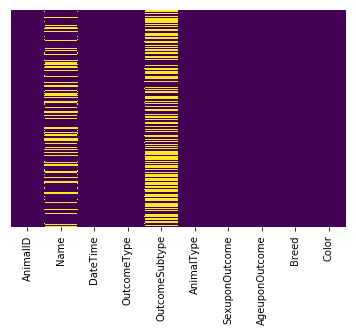

In [4]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [5]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


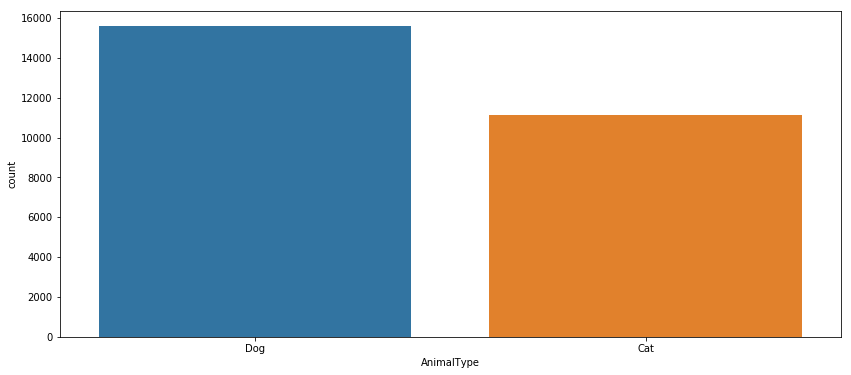

In [6]:
plt.figure(figsize=(14,6))
sns.countplot(train['AnimalType'])

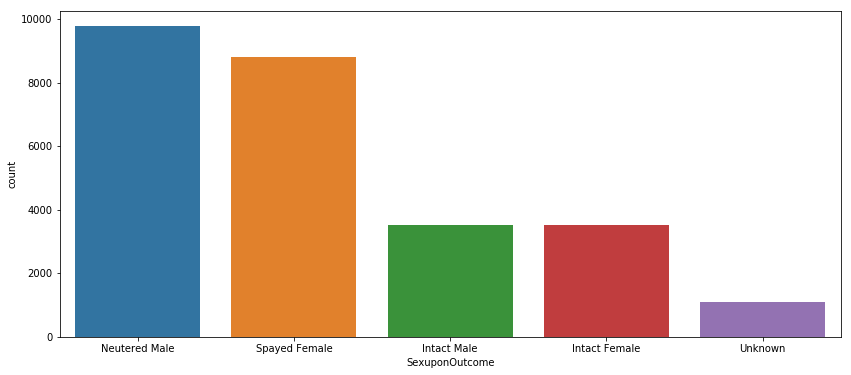

In [7]:
plt.figure(figsize=(14,6))
sns.countplot(train['SexuponOutcome'])

In [8]:
new = []
for item in train['Breed']:
    if 'Mix' in item.split():
        new.append('mixed') 
    else:
        new.append('pure') 
        
train['nBreed'] = new

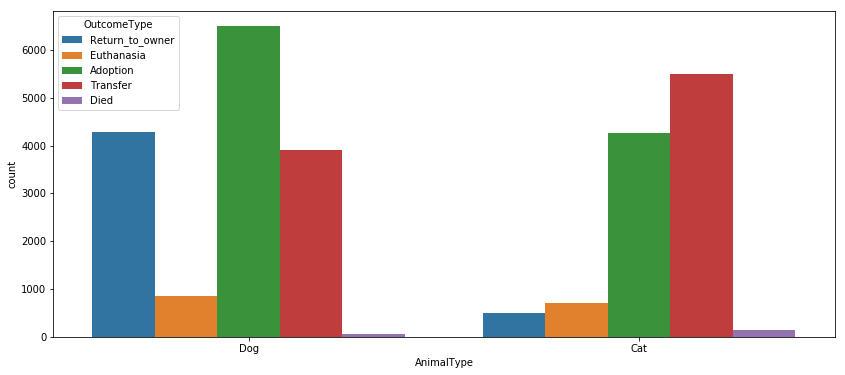

In [10]:
plt.figure(figsize=(14,6))
sns.countplot(x='AnimalType',data=train, hue='OutcomeType')

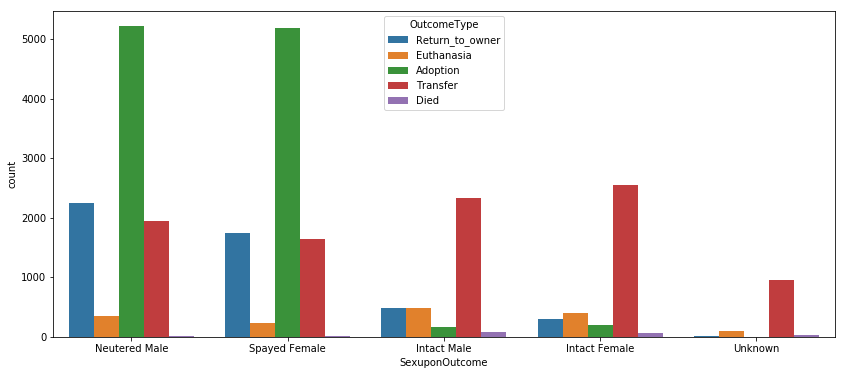

In [11]:
#countplot Outcome type (hue sex upon outcome)
plt.figure(figsize=(14,6))
sns.countplot(x='SexuponOutcome',data=train,hue='OutcomeType')

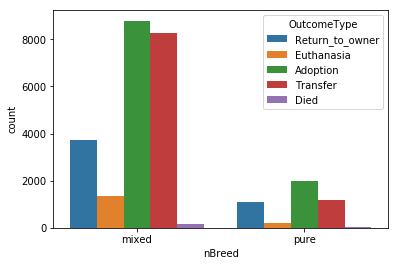

In [12]:
#countplot breed type (hue OutcomeType)
sns.countplot(x='nBreed', data=train, hue='OutcomeType')

In [13]:
train['OutcomeType'].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'],
      dtype=object)

In [14]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,nBreed
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,mixed
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,mixed
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,mixed
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,mixed
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,pure


In [15]:
train.drop(['AnimalID','Name','DateTime','OutcomeSubtype','AgeuponOutcome','Breed','Color'],axis=1,inplace=True)

In [16]:
train.head()

,OutcomeType,AnimalType,SexuponOutcome,nBreed
0,Return_to_owner,Dog,Neutered Male,mixed
1,Euthanasia,Cat,Spayed Female,mixed
2,Adoption,Dog,Neutered Male,mixed
3,Transfer,Cat,Intact Male,mixed
4,Transfer,Dog,Neutered Male,pure


In [17]:
#create dummy values
outcome = pd.get_dummies(train['OutcomeType'])
animal = pd.get_dummies(train['AnimalType'],drop_first=True)
sex = pd.get_dummies(train['SexuponOutcome'])
breed = pd.get_dummies(train['nBreed'],drop_first=True)

In [18]:
train = pd.concat([train,outcome,animal,sex,breed],axis=1)

In [19]:
train.head()

,OutcomeType,AnimalType,SexuponOutcome,nBreed,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Dog,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,pure
0,Return_to_owner,Dog,Neutered Male,mixed,0,0,0,1,0,1,0,0,1,0,0,0
1,Euthanasia,Cat,Spayed Female,mixed,0,0,1,0,0,0,0,0,0,1,0,0
2,Adoption,Dog,Neutered Male,mixed,1,0,0,0,0,1,0,0,1,0,0,0
3,Transfer,Cat,Intact Male,mixed,0,0,0,0,1,0,0,1,0,0,0,0
4,Transfer,Dog,Neutered Male,pure,0,0,0,0,1,1,0,0,1,0,0,1


In [20]:
train.drop(['OutcomeType','AnimalType','SexuponOutcome','nBreed','Transfer','Euthanasia','Return_to_owner','Died'],axis=1,inplace=True)

In [21]:
train.head()

,Adoption,Dog,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,pure
0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,1


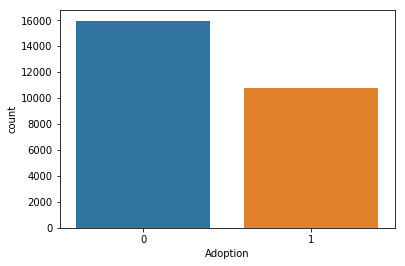

In [22]:
sns.countplot(train['Adoption'])

TIME FOR ML ALGORITHM

In [23]:
x = train[['Dog','Intact Female','Intact Male','Neutered Male','Spayed Female','Unknown','pure']]
y = train['Adoption']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lm = LogisticRegression()

In [28]:
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
prediction = lm.predict(x_test)
lm.score(x_test,y_test)

0.6934587915202358

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.80      0.65      0.72      5278
          1       0.59      0.75      0.66      3543

avg / total       0.72      0.69      0.70      8821



In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

[[3451 1827]
 [ 877 2666]]


In [34]:
#GUI for the project

from tkinter import *

from PIL import ImageTk,Image
from tkinter.ttk import *
 
window = Tk()
 
window.title("Adoption Predictor")
 
window.geometry("500x300")

lbl = Label(window, text="Species:  ",font=("Times New Roman", 24),justify=CENTER)
lbl.grid(column=0, row=0)
lbl1 = Label(window, text="Type:  ",font=("Times New Roman", 24),justify=CENTER)
lbl1.grid(column=0, row=1)
lbl1 = Label(window, text="Breed:  ",font=("Times New Roman", 24),justify=CENTER)
lbl1.grid(column=0, row=2)
lbl4 = Label(window, text="Prediction:",font=("Times New Roman", 24),justify=CENTER)
lbl4.grid(column=0, row=4)
lbl5 = Label(window, text="",font=("Times New Roman", 24),justify=CENTER)
lbl5.grid(column=1, row=4)
 

combo = Combobox(window)
 
combo['values']= ('Dog','Cat')
 
combo.current(0) 
combo.grid(column=1, row=0)




combo1 = Combobox(window)
 
combo1['values']= ('Intact Male','Neutered Male','Spayed Female','Intact Female','Unknown')
 
combo1.current(0) 
 
combo1.grid(column=1, row=1)



combo2 = Combobox(window)
 
combo2['values']= ('Mixed','Pure')
 
combo2.current(0) 
 
combo2.grid(column=1, row=2)




def clicked():
    a=[]
    species=combo.get()
    type1=combo1.get()
    breed=combo2.get()
    
    if species == "Dog":
        a.append(1)
    else:
        a.append(0)
    if type1 == "Intact Female":
        a.append(1)
        a.append(0)
        a.append(0)
        a.append(0)
        a.append(0)
    elif type1 == "Intact Male":
        a.append(0)
        a.append(1)
        a.append(0)
        a.append(0)
        a.append(0)
    elif type1 == "Neutered Male":
        a.append(0)
        a.append(0)
        a.append(1)
        a.append(0)
        a.append(0)
    elif type1 == "Spayed Female":
        a.append(0)
        a.append(0)
        a.append(0)
        a.append(1)
        a.append(0) 
    elif type1 == "Unknown":
        a.append(0)
        a.append(0)
        a.append(0)
        a.append(0)
        a.append(1)
    if breed == "Pure":
        a.append(1)
    else:
        a.append(0)
    val=lm.predict([a])
    if val == [1]:
        lbl5.configure(text="Will Be Adopted")
    else:
        lbl5.configure(text="Will Not Be Adopted")
        

btn = Button(window, text="Predict", command=clicked)
btn.grid(column=1, row=3)

window.mainloop()